# Expressions

Esta tabla contiene la información a nivel de expression. --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt

from notebooks_utils import *

full_table = get_data('expressions')

# Table name, features and target.
TABLE_NAME = 'expressions'
TABLE_FEATURES = ['expression__category','expression__parent','expression__first_child_category','expression__second_child_category','expression__third_child_category','expression__fourth_child_category','expression__expression_role','expression__height','expression__depth','expression__expertise_level']
TABLE_TARGET = 'expression__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-05 19:57:03.939657 Data cache files found ...
2024-05-05 19:57:09.717298 Data cache files successfully loaded!!
Features shape: (8102385, 10)
Target shape: (8102385,)
As we can see the downloaded data contains a total of 8102385 instances. Each of the instances corresponds to a program. For each program we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102385 entries, 0 to 8102384
Data columns (total 10 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   expression__category               object
 1   expression__parent                 object
 2   expression__first_child_category   object
 3   expression__second_child_category  object
 4   expression__third_child_category   object
 5   expression__fourth_child_category  object
 6   expression__expression_role        object
 7   expression__height                 int64 
 8   expression__depth                  int64 
 9   expression__expertise_level        object
dtypes: int64(2), object(8)
memory usage: 618.2+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 8102385 entries, 0 to 8102384
Series name: expression__expertise_level
Non-Null Count    Dtype 
--------------    ----- 
8102385 non-null  object
dtypes: object(1)
memory usage: 61.8+ MB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas y 8 de tipo objeto (cetegoricas). Una de ellas es la clase con la que se ha etiquetado la instancia. Sin embargo, en algunas ocasiones esta última clase no la vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 42.52% instances for BEGINNER class and 57.48% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [98.31%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

expression__category                       0
expression__parent                         0
expression__first_child_category     5213654
expression__second_child_category    6744734
expression__third_child_category     7699395
expression__fourth_child_category    7964567
expression__expression_role                0
expression__height                         0
expression__depth                          0
expression__expertise_level                0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [6]:
print_empty_cols(X)

expression__category
--------------------
0 instancias no tienen un valor para la columna expression__category


expression__parent
------------------
0 instancias no tienen un valor para la columna expression__parent


expression__first_child_category
--------------------------------
0 instancias no tienen un valor para la columna expression__first_child_category


expression__second_child_category
---------------------------------
0 instancias no tienen un valor para la columna expression__second_child_category


expression__third_child_category
--------------------------------
0 instancias no tienen un valor para la columna expression__third_child_category


expression__fourth_child_category
---------------------------------
0 instancias no tienen un valor para la columna expression__fourth_child_category


expression__expression_role
---------------------------
0 instancias no tienen un valor para la columna expression__expression_role


expression__height
------------------
0 inst

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
expression__category,8102385,39,Variable,2782098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__parent,8102385,49,Call,1929892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__first_child_category,2888731,38,Variable,1447334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__second_child_category,1357651,36,Variable,449233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__third_child_category,402990,37,StringLiteral,123449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__fourth_child_category,137818,34,Variable,37395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__expression_role,8102385,79,CallArg,1096702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__height,8102385.0,NaN,NaN,NaN,5.169738,2.227696,1.0,4.0,5.0,6.0,83.0
expression__depth,8102385.0,NaN,NaN,NaN,0.602559,1.086327,0.0,0.0,0.0,1.0,81.0
expression__expertise_level,8102385,2,EXPERT,4656866,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias). Revisar programa con 3k modulos y 1k paquetes.

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "expression__height": [(1, 3), (3, 4), (4, 5), (5, 6) ,(6, 7), (7, inf)],  # min: 1 max: 83
    "expression__depth": [(0, 1), (1, 2), (2, inf)],  # min: 1 max: 81
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['expression__category'], 10))
print(get_statistics(X_copy, ['expression__parent'], 10))
print(get_statistics(X_copy, ['expression__first_child_category'], 10))
print(get_statistics(X_copy, ['expression__second_child_category'], 10))
print(get_statistics(X_copy, ['expression__third_child_category'], 10))
print(get_statistics(X_copy, ['expression__fourth_child_category'], 10))
print(get_statistics(X_copy, ['expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__height'], 10))
print(get_statistics(X_copy, ['expression__depth'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__category', 'expression__parent'], 10))
print(get_statistics(X_copy, ['expression__parent', 'expression__expression_role'], 10))


# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__first_child_category', 'expression__second_child_category'], 10))


--- SINGLE FEATURE ---
expression__category   count  percentage
            Variable 2782098   34.336779
       StringLiteral 1073503   13.249222
          IntLiteral 1041046   12.848637
                 Dot  960865   11.859039
                Call  833190   10.283268
        TupleLiteral  233120    2.877178
            Indexing  172908    2.134038
             Compare  168239    2.076413
        FloatLiteral  150544    1.858021
     UnaryArithmetic  146572    1.808998

expression__parent   count  percentage
              Call 1929892   23.818814
               Dot  960865   11.859039
    AssignmentStmt  943987   11.650730
      TupleLiteral  882145   10.887473
 DictionaryLiteral  847094   10.454872
          Indexing  345816    4.268077
           Compare  337963    4.171155
                If  246143    3.037908
        Arithmetic  217180    2.680445
       ListLiteral  214802    2.651096

expression__first_child_category   count  percentage
                        Variable 1447334  

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (8102385, 316)
Target shape: (8102385,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

In [10]:
# Con estos datos (8102385, 316) la matriz de confusion es demasiado grande.
# sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (7 categoricas y 2 numericas) se hara un analisis detallado 

### Variable expression__category (1/9)
Esta variable es de tipo categorica y representa la categoria de la expresion.

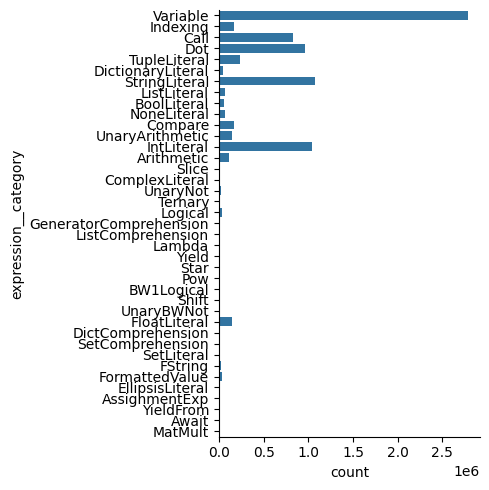

In [11]:
sns.catplot(full_table['expression__category'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__category')

La variable expression__category contiene 39 valores distintos.
El umbral de outlier es de 0.005128205128205128%
La variable expression__category toma el valor de Variable en un 34.34% de los items.
La variable expression__category toma el valor de StringLiteral en un 13.25% de los items.
La variable expression__category toma el valor de IntLiteral en un 12.85% de los items.
La variable expression__category toma el valor de Dot en un 11.86% de los items.
La variable expression__category toma el valor de Call en un 10.28% de los items.
La variable expression__category toma el valor de TupleLiteral en un 2.877% de los items.
La variable expression__category toma el valor de Indexing en un 2.134% de los items.
La variable expression__category toma el valor de Compare en un 2.076% de los items.
La variable expression__category toma el valor de FloatLiteral en un 1.858% de los items.
La variable expression__category toma el valor de UnaryArithmetic en un 1.809% de los items.
La variable exp

## Multivariate

TODO: isolation forest algorithm

In [13]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012

isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.to_numpy())
mask = isof_prediction == -1
multivar_outliers = X[mask].index.tolist()
full_table.iloc[multivar_outliers]

,expression__expression_id,expression__category,expression__parent,expression__first_child_category,expression__second_child_category,expression__third_child_category,expression__fourth_child_category,expression__expression_role,expression__height,expression__depth,expression__expertise_level
181,327845,DictionaryLiteral,Indexing,StringLiteral,IntLiteral,StringLiteral,IntLiteral,Indexing,6,1,EXPERT
422,327565,DictionaryLiteral,Indexing,StringLiteral,IntLiteral,StringLiteral,IntLiteral,Indexing,6,1,EXPERT
533,327452,DictionaryLiteral,Indexing,StringLiteral,IntLiteral,StringLiteral,IntLiteral,Indexing,6,1,EXPERT
6531,320461,DictionaryLiteral,Call,StringLiteral,Variable,StringLiteral,Variable,CallArg,8,1,EXPERT
6553,320436,ListLiteral,Call,StringLiteral,StringLiteral,StringLiteral,None,CallArg,9,1,EXPERT
...,...,...,...,...,...,...,...,...,...,...,...
8097611,9334155,ListLiteral,AssignmentStmt,StringLiteral,StringLiteral,StringLiteral,StringLiteral,AssignRHS,2,1,BEGINNER
8097802,9333931,ListLiteral,Compare,StringLiteral,StringLiteral,StringLiteral,StringLiteral,Relational,6,1,BEGINNER
8098483,9334979,ListLiteral,AssignmentStmt,StringLiteral,StringLiteral,StringLiteral,StringLiteral,AssignRHS,2,1,BEGINNER
8098541,9335204,ListLiteral,AssignmentStmt,StringLiteral,StringLiteral,StringLiteral,StringLiteral,AssignRHS,2,1,BEGINNER
